In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [12]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.

X, y = make_classification(n_samples=1000, n_features=8, n_informative = 5, class_sep = 2, random_state = 42)

columns = [1, 2, 3, 4, 5, 6, 7, 8]
df = pd.DataFrame(data=X, index=range(1000), columns=columns)

In [14]:
df.head()

,1,2,3,4,5,6,7,8
0,-0.756153,-1.164471,-0.705182,1.108321,-1.078425,0.990766,1.363777,1.727296
1,-0.349763,-0.725064,-0.776536,0.164623,-2.123291,-0.312199,0.081420,1.073886
2,-4.390672,-1.590640,-1.343470,9.286103,2.222753,1.085890,-2.715076,4.223089
3,1.064793,0.967040,-0.723131,-3.114630,0.798928,0.214848,1.890636,-2.379626
4,-0.561940,-1.914989,0.953398,1.090123,-1.048063,-0.600604,1.511169,0.550706


In [17]:
df.describe()

,1,2,3,4,5,6,7,8
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.011035,-0.992447,-0.042531,1.281358,0.980472,0.940024,0.999845,0.969059
std,2.368319,2.162463,1.042954,4.299708,2.194454,2.243316,2.219235,2.131681
min,-6.814203,-5.258034,-3.582063,-10.154179,-5.661168,-7.037758,-4.117079,-3.961769
25%,-2.065423,-2.442564,-0.734871,-1.784043,-0.444584,-0.475777,-0.792475,-0.790478
50%,0.188279,-1.643173,-0.030551,1.821636,1.517834,1.131113,1.401614,1.525408
75%,1.916099,-0.267244,0.642444,3.944946,2.507637,2.414038,2.531734,2.447875
max,5.605669,6.685693,3.240139,10.944172,6.066061,8.501559,6.608412,7.036793


In [20]:
# Check duplicate values and missing data.

df.isna().sum()

1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [21]:
df[df.duplicated()]

,1,2,3,4,5,6,7,8


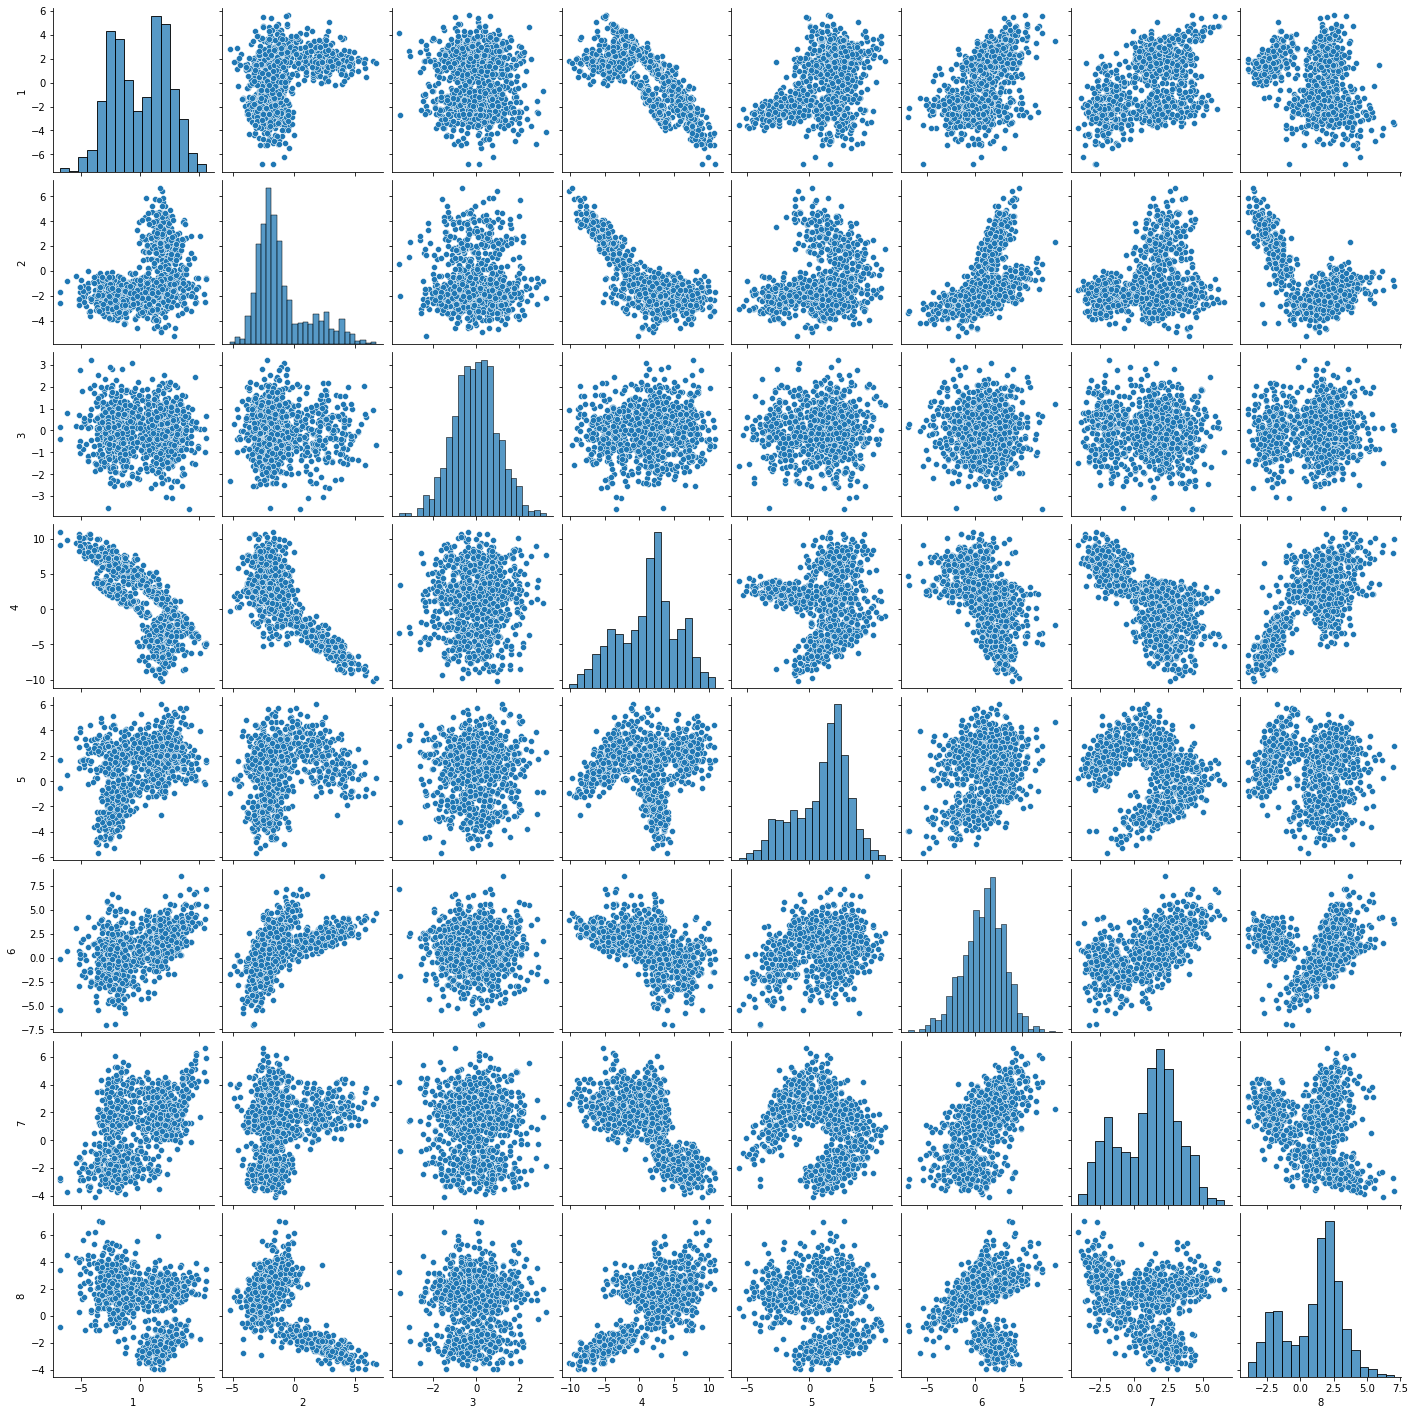

In [22]:
 #Visualize data for each feature (pairplot,distplot).

sns.pairplot(df)

In [23]:
# Draw correlation matrix.

corr = df.corr()
corr

,1,2,3,4,5,6,7,8
1,1.000000,0.416771,-0.049054,-0.746699,0.423516,0.520381,0.491989,-0.402051
2,0.416771,1.000000,-0.033233,-0.772650,0.176962,0.529420,0.265770,-0.655833
3,-0.049054,-0.033233,1.000000,0.065201,0.040736,-0.024342,-0.045234,0.026617
4,-0.746699,-0.772650,0.065201,1.000000,0.017322,-0.539766,-0.699750,0.694956
5,0.423516,0.176962,0.040736,0.017322,1.000000,0.263799,-0.210669,-0.114389
6,0.520381,0.529420,-0.024342,-0.539766,0.263799,1.000000,0.594759,0.078637
7,0.491989,0.265770,-0.045234,-0.699750,-0.210669,0.594759,1.000000,-0.256036
8,-0.402051,-0.655833,0.026617,0.694956,-0.114389,0.078637,-0.256036,1.000000


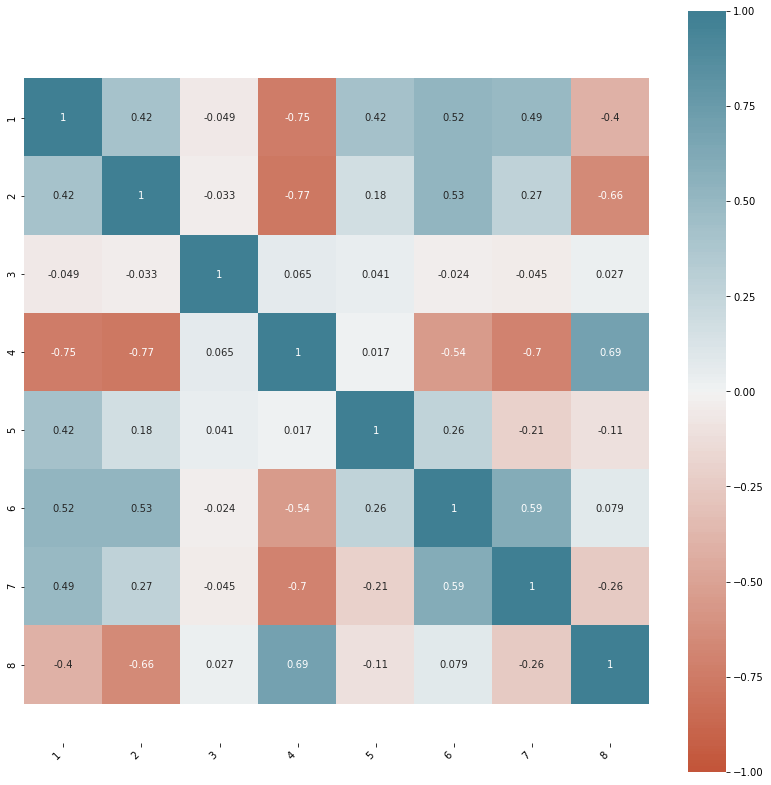

In [26]:
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [28]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)

from scipy import stats
z = np.abs(stats.zscore(df))
z


array([[0.3147762 , 0.07958996, 0.63567808, ..., 0.02263053, 0.16407219,
        0.35587728],
       [0.14309631, 0.12370915, 0.70412792, ..., 0.55848095, 0.41405454,
        0.04920046],
       [1.85018486, 0.27676419, 1.24798476, ..., 0.0650551 , 1.67480255,
        1.52727275],
       ...,
       [0.7948603 , 0.25018552, 0.76093524, ..., 0.55495903, 1.71314673,
        0.93007299],
       [0.32250431, 2.21240704, 0.35056551, ..., 0.81327217, 0.5874893 ,
        1.7494309 ],
       [1.51706964, 0.43299196, 2.47896247, ..., 1.08924599, 1.42863043,
        0.09850057]])

In [29]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)

15

In [33]:
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]
len(y_new)
new_df.drop(['index'], axis=1, inplace=True)

,index,1,2,3,4,5,6,7,8
0,0,-0.756153,-1.164471,-0.705182,1.108321,-1.078425,0.990766,1.363777,1.727296
1,1,-0.349763,-0.725064,-0.776536,0.164623,-2.123291,-0.312199,0.081420,1.073886
2,2,-4.390672,-1.590640,-1.343470,9.286103,2.222753,1.085890,-2.715076,4.223089
3,3,1.064793,0.967040,-0.723131,-3.114630,0.798928,0.214848,1.890636,-2.379626
4,4,-0.561940,-1.914989,0.953398,1.090123,-1.048063,-0.600604,1.511169,0.550706
...,...,...,...,...,...,...,...,...,...
980,995,2.887202,-1.045570,-0.668876,-0.884461,1.973363,3.040845,2.151270,1.966244
981,996,-0.912929,-1.251949,1.179913,1.833829,-0.211064,1.078609,1.239636,1.703973
982,997,-1.892576,-1.533193,0.750693,5.846840,0.844300,-0.304302,-2.800129,2.950686
983,998,0.752376,3.789408,-0.407971,-5.246543,1.449600,2.763538,2.302969,-2.758305


In [35]:
# Split dataset into train and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df, y_new, test_size=0.3, random_state=42)

In [36]:
# Import Decision Tree, define different hyperparamters and tune the algorithm

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9811320754716981
Accuracy of test: 0.9662162162162162


In [40]:
#Decision Tree Algorithm
import os
from sklearn.tree import export_graphviz
os.environ["PATH"] += ';' + r'C:\Users\Resul\anaconda3\Library\bin\graphviz'

In [57]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [58]:
import graphviz

In [59]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
dot_df = export_graphviz(clf, out_file=None,
                     feature_names=df.columns,
                     class_names=['0', '1'],
                     filled=True, rounded=True)
graph = graphviz.Source(dot_df)
graph

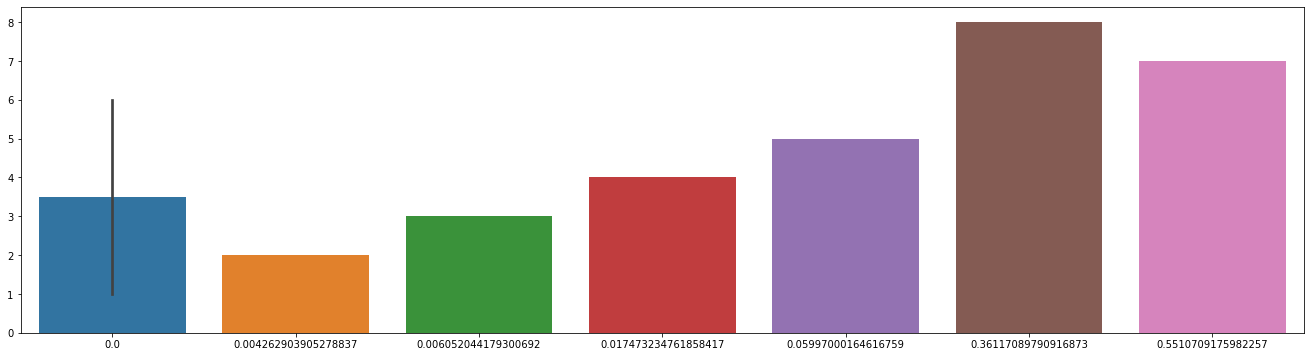

In [65]:
# Visualize feature importances
plt.figure(figsize=(23, 6))
importance = clf.feature_importances_
sns.barplot(x=importance, y=df.columns)
plt.show()

In [66]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 sco

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       154
           1       0.95      0.99      0.97       142

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



In [67]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9662162162162162
Recall = 0.9669837205048473
Accuracy = 0.9662162162162162
F1 Score = 0.9662023292989267


Text(204.36, 0.5, 'True Labels')

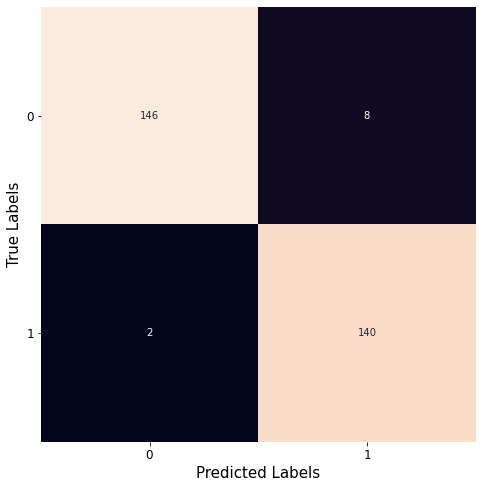

In [68]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)

In [72]:
pip install xgboost

In [73]:

import xgboost as xgb


In [74]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':4, 
         'eta':1, 
         'objective':'multi:softprob', 
         'eval_metric':'mlogloss',
         'num_class':2}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [77]:
preds = model.predict(dmatrix_test)
preds[:5]

array([[0.00212504, 0.997875  ],
       [0.00492157, 0.99507844],
       [0.00212504, 0.997875  ],
       [0.00758254, 0.99241745],
       [0.00212504, 0.997875  ]], dtype=float32)

In [78]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

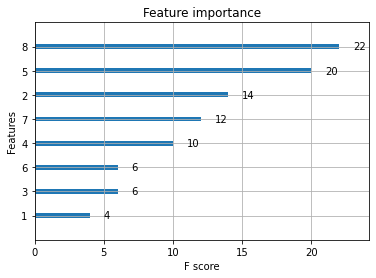

In [79]:
# Visualize feature importances.

xgb.plot_importance(model)

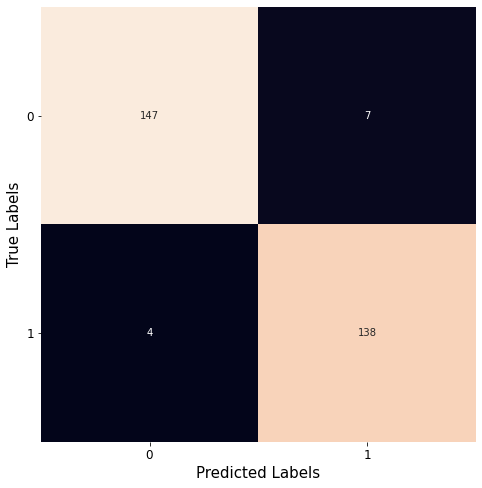

In [80]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [81]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9626170358529345
Recall = 0.9631882202304738
Accuracy = 0.9628378378378378


In [82]:
## Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=2000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, eval_metric='mlogloss', seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("\nTuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Tuned: {'learning_rate': 0.01, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 1000}
Mean of the cv scores is 0.976774
Train Score 0.997097
Test Score 0.966216
Seconds used for refitting the best model on the train dataset: 2.080966


Text(204.36, 0.5, 'True Labels')

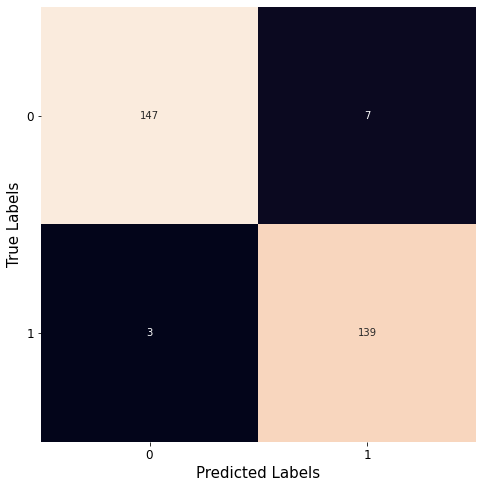

In [83]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)

In [ ]:
 # Evaluate your result and select best performing algorithm for our case.
#  According to the all models we can say that XGBoost Algorithm is more than accurate than the results of obtained bu decision tree.